In [8]:
pip install opencv-python

  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('./archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


./archive\all-mias.tar.gz
./archive\all_mias_scans.h5
./archive\Info.txt
./archive\all-mias\Info.txt
./archive\all-mias\Licence.txt
./archive\all-mias\mdb001.pgm
./archive\all-mias\mdb002.pgm
./archive\all-mias\mdb003.pgm
./archive\all-mias\mdb004.pgm
./archive\all-mias\mdb005.pgm
./archive\all-mias\mdb006.pgm
./archive\all-mias\mdb007.pgm
./archive\all-mias\mdb008.pgm
./archive\all-mias\mdb009.pgm
./archive\all-mias\mdb010.pgm
./archive\all-mias\mdb011.pgm
./archive\all-mias\mdb012.pgm
./archive\all-mias\mdb013.pgm
./archive\all-mias\mdb014.pgm
./archive\all-mias\mdb015.pgm
./archive\all-mias\mdb016.pgm
./archive\all-mias\mdb017.pgm
./archive\all-mias\mdb018.pgm
./archive\all-mias\mdb019.pgm
./archive\all-mias\mdb020.pgm
./archive\all-mias\mdb021.pgm
./archive\all-mias\mdb022.pgm
./archive\all-mias\mdb023.pgm
./archive\all-mias\mdb024.pgm
./archive\all-mias\mdb025.pgm
./archive\all-mias\mdb026.pgm
./archive\all-mias\mdb027.pgm
./archive\all-mias\mdb028.pgm
./archive\all-mias\mdb029.pg

**The dataset used here is composed of images from the MIAS Mammography dataset**

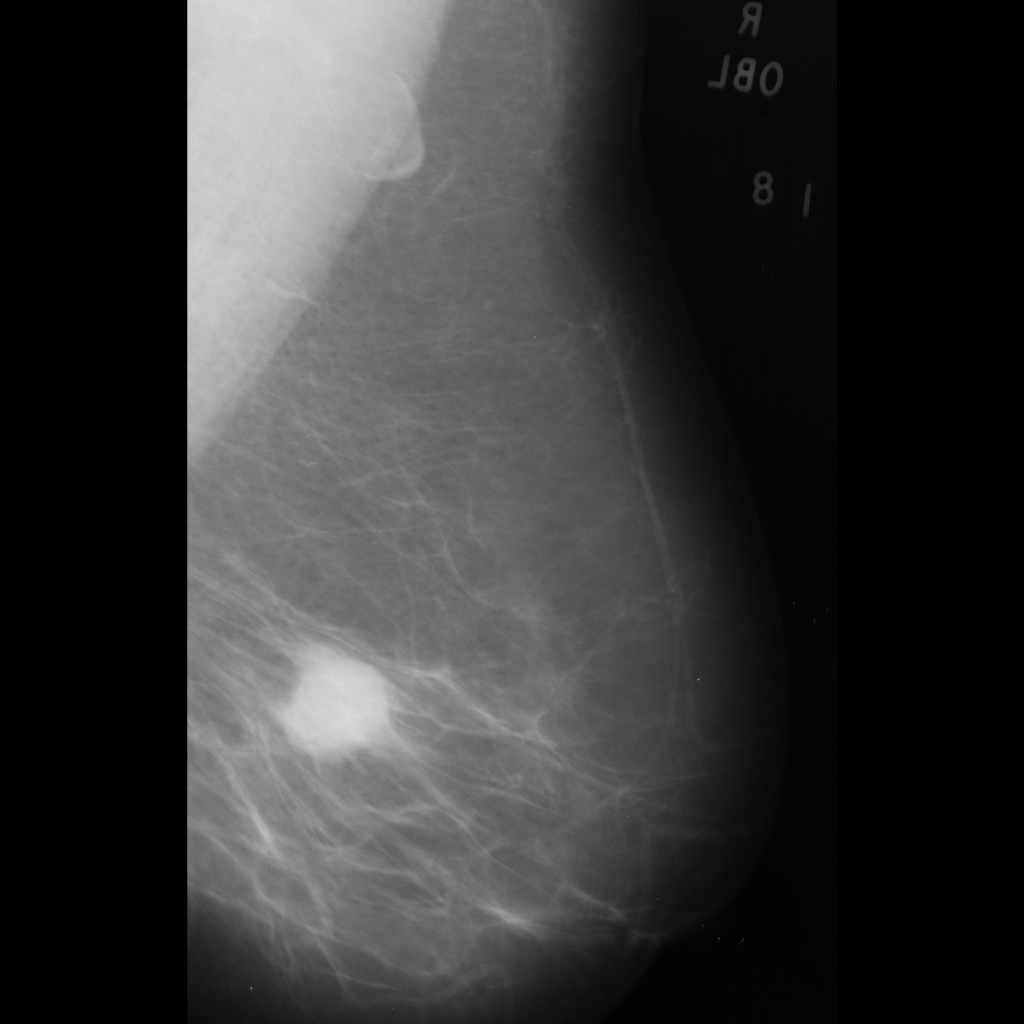

In [33]:
from PIL import Image
im = Image.open("./archive/all-mias/mdb028.pgm")
im

**Importing all the necessary packages.**

In [34]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import clear_output
from tqdm.notebook import tqdm
import cv2
from sklearn.model_selection import train_test_split
import random

In [35]:
imgs_path = './archive/all-mias/' #assigning the image path value to imgs_path

**Reading the dataframe**

In [36]:
info=pd.read_csv("./archive/Info.txt",sep=" ")
info=info.drop('Unnamed: 7',axis=1)

In [37]:
info

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS
0,mdb001,G,CIRC,B,535.0,425.0,197.0
1,mdb002,G,CIRC,B,522.0,280.0,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477.0,133.0,30.0
...,...,...,...,...,...,...,...
325,mdb318,D,NORM,NaN,NaN,NaN,NaN
326,mdb319,D,NORM,NaN,NaN,NaN,NaN
327,mdb320,D,NORM,NaN,NaN,NaN,NaN
328,mdb321,D,NORM,NaN,NaN,NaN,NaN


In [38]:
ids = {}
for i in range(len(info)):
    ids[i] = info.REFNUM[i]

In [39]:
# Turning our outputs Normal-Abnormal to 0-1
label = []
for i in range(len(info)):
    if info.CLASS[i] != 'NORM':
        label.append(1)
    else:
        label.append(0)
label = np.array(label)
print(f"Total Images: {len(label)}\nNormales: {len(label)-np.sum(label)}\nNo normales: {np.sum(label)}")

Total Images: 330
Normales: 207
No normales: 123


In [40]:
# define the every images filepaths in to list
img_name = []

for i in range(len(label)):
        img_name.append(imgs_path + info.REFNUM[i]+ '.pgm')

In [41]:
count = 0
remove = True
temp_label = []
temp_img_name = []

for i, lbl in enumerate(label.tolist()):
    if lbl == 0 and remove == True:
        count = count + 1
        if count >= 84:
            remove = False
    else:
        temp_label.append(lbl)
        temp_img_name.append(img_name[i])
label = np.array(temp_label)
img_name = temp_img_name

In [42]:
img_name = np.array(img_name)
img_name.shape

(246,)

In [43]:
print(img_name)
print(f'image address amount {img_name.shape}')

['./archive/all-mias/mdb001.pgm' './archive/all-mias/mdb002.pgm'
 './archive/all-mias/mdb005.pgm' './archive/all-mias/mdb005.pgm'
 './archive/all-mias/mdb010.pgm' './archive/all-mias/mdb012.pgm'
 './archive/all-mias/mdb013.pgm' './archive/all-mias/mdb015.pgm'
 './archive/all-mias/mdb017.pgm' './archive/all-mias/mdb019.pgm'
 './archive/all-mias/mdb021.pgm' './archive/all-mias/mdb023.pgm'
 './archive/all-mias/mdb025.pgm' './archive/all-mias/mdb028.pgm'
 './archive/all-mias/mdb030.pgm' './archive/all-mias/mdb032.pgm'
 './archive/all-mias/mdb058.pgm' './archive/all-mias/mdb059.pgm'
 './archive/all-mias/mdb063.pgm' './archive/all-mias/mdb069.pgm'
 './archive/all-mias/mdb072.pgm' './archive/all-mias/mdb075.pgm'
 './archive/all-mias/mdb080.pgm' './archive/all-mias/mdb081.pgm'
 './archive/all-mias/mdb083.pgm' './archive/all-mias/mdb090.pgm'
 './archive/all-mias/mdb091.pgm' './archive/all-mias/mdb092.pgm'
 './archive/all-mias/mdb095.pgm' './archive/all-mias/mdb097.pgm'
 './archive/all-mias/mdb0

**Some random images for visualization**

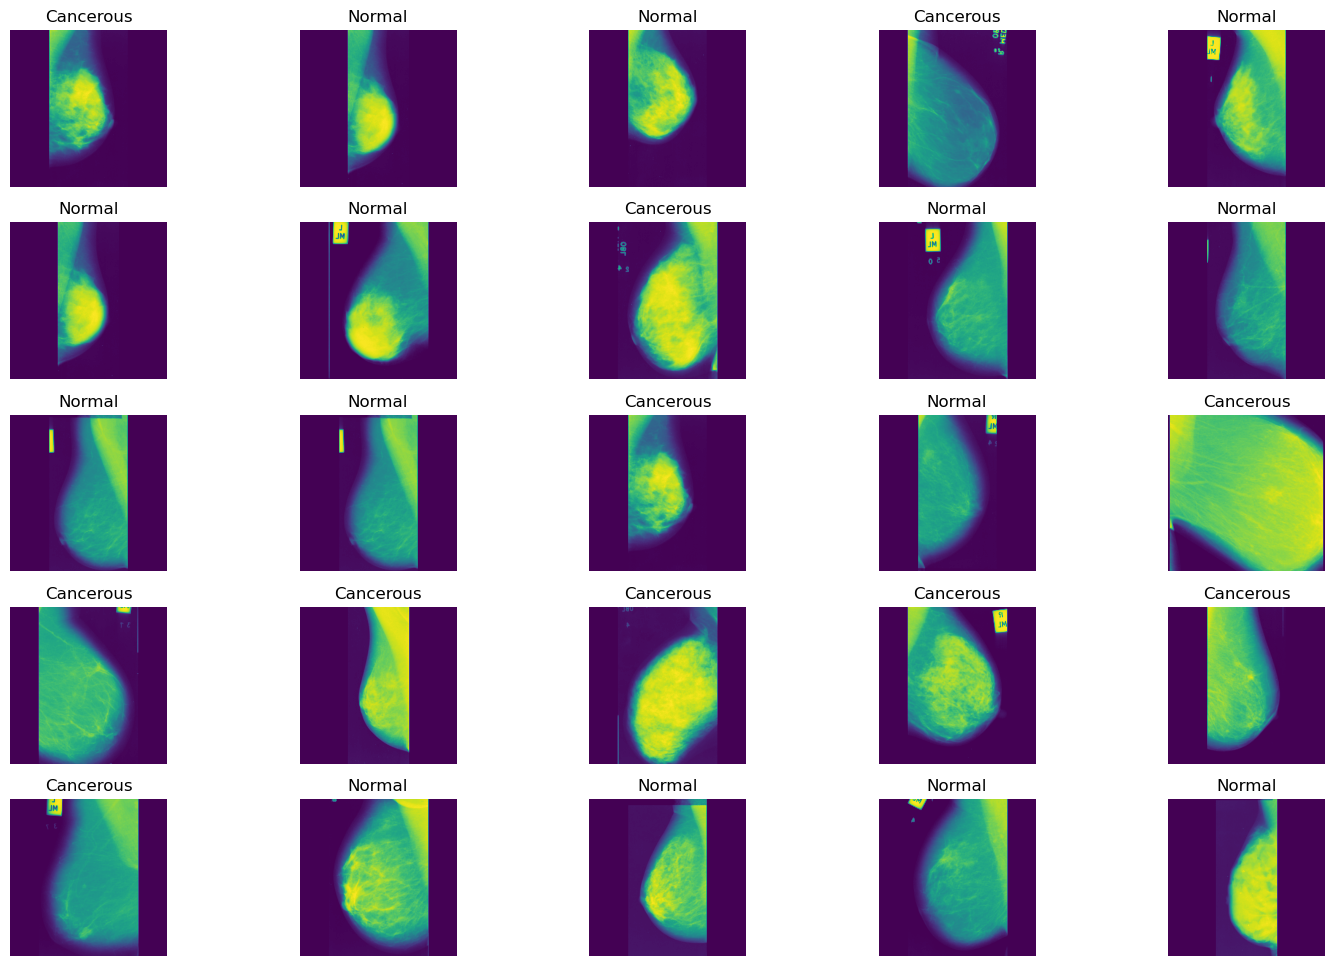

In [44]:
# view image random images
def view_25_random_image():
    fig = plt.figure(figsize = (15, 10))
    for i in range(25):
        rand = random.randint(0,len(label))
        ax = plt.subplot(5, 5, i+1)
    
        img = cv2.imread(img_name[rand], 0)
        img = cv2.resize(img, (256,256))
        if label[rand] == 1:
            plt.title('Cancerous')
        else:
            plt.title('Normal')
        plt.tight_layout()
        plt.axis('off')
        plt.imshow(img)
    fig.savefig('random_25_image_fig.png')

random_images = view_25_random_image()

In [45]:
img_path = []
last_label = []
IMG_SIZE = 128

for i in range(len(img_name)):
    
    img = cv2.imread(img_name[i], 0)
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    rows, cols= img.shape
    for angle in range(180):
            M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle*2, 1)    #Rotate 0 degree
            img_rotated = cv2.warpAffine(img, M, (IMG_SIZE, IMG_SIZE))
            img_path.append(img_rotated)
            if label[i] == 1:
                last_label.append(1)
            else:
                last_label.append(0)

In [46]:
img_path = np.array(img_path)
last_label = np.array(last_label)
img_path.shape

(44280, 128, 128)

In [47]:
img_path = img_path.reshape((-1,IMG_SIZE,IMG_SIZE,1))
img_path.shape

(44280, 128, 128, 1)

In [48]:
last_label.shape

(44280,)

In [49]:
# split train and test set
x_train, x_test, y_train, y_test = train_test_split(img_path, last_label, test_size = 0.2, random_state = 42)

In [50]:
len(x_train),len(x_test),len(y_train),len(y_test)

(35424, 8856, 35424, 8856)

In [51]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.activations import *
from keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from time import time

In [52]:
reg = tf.keras.regularizers.L2(l2=1e-5)
ini = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02, seed=None)


model = Sequential()
model.add(Conv2D(32,
                 kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer = ini,
                 input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(Conv2D(64,
                 kernel_size=(3,3),
                 kernel_initializer = ini,
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, 
                 kernel_size=(3,3),
                 kernel_initializer = ini,
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Dense(64, 
                kernel_initializer = ini,
                activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(
    learning_rate=1e-3)

model.compile(optimizer=optimizer,
              loss= 'binary_crossentropy',
              metrics=['accuracy'])

C:\Users\nagac\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [53]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30, 30, 64)     │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │        57,601 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,505 (459.00 KB)

 Trainable params: 117,505 (459.00 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5 ,restore_best_weights=True, verbose=1)

check_point_filepath = './model.keras'

model_check_point = ModelCheckpoint(filepath =check_point_filepath, monitor='val_loss', verbose=1, save_best_only=True,
                                    save_weights_only=False, mode='auto', save_freq='epoch')

In [56]:
train = True
if train:
    epochs=100
    history = model.fit(x_train,
                 y_train,
                 validation_split=0.2,
                 epochs=epochs,
                 batch_size=128,
                 callbacks=[early_stop, model_check_point])
else:
    model = tf.keras.models.load_model('./model.keras')

Epoch 1/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5080 - loss: 0.6948
Epoch 1: val_loss improved from inf to 0.69157, saving model to ./model.keras
222/222 ━━━━━━━━━━━━━━━━━━━━ 369s 2s/step - accuracy: 0.5080 - loss: 0.6948 - val_accuracy: 0.5105 - val_loss: 0.6916
Epoch 2/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5234 - loss: 0.6899
Epoch 2: val_loss improved from 0.69157 to 0.68665, saving model to ./model.keras
222/222 ━━━━━━━━━━━━━━━━━━━━ 373s 2s/step - accuracy: 0.5234 - loss: 0.6899 - val_accuracy: 0.5392 - val_loss: 0.6867
Epoch 3/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5576 - loss: 0.6772
Epoch 3: val_loss improved from 0.68665 to 0.67497, saving model to ./model.keras
222/222 ━━━━━━━━━━━━━━━━━━━━ 383s 2s/step - accuracy: 0.5576 - loss: 0.6772 - val_accuracy: 0.5625 - val_loss: 0.6750
Epoch 4/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5923 - loss: 0.6605
Epoch 4: val_loss improved from 0.67497 to 0.64937, saving m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
The results was: True       And the probability being: 0.9999861717224121
Real value was: True
Test id: 2056


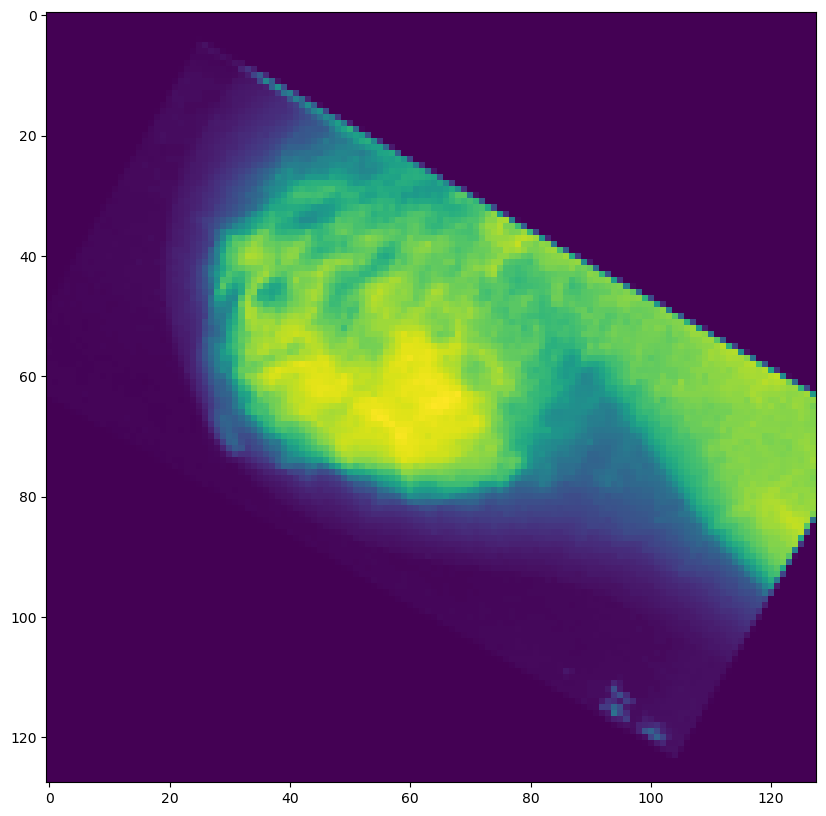

In [57]:
from random import randint
test_num = randint(0,len(x_test))
#test_num = 6948
result = model.predict(np.array([x_test[test_num]]))

plt.figure(figsize= (10,10))
plt.imshow(x_test[test_num])

print(f"The results was: {result[0][0]>= 0.5}       And the probability being: {result[0][0]}\nReal value was: {y_test[test_num]>=0.5}")
print(f"Test id: {test_num}")

In [58]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

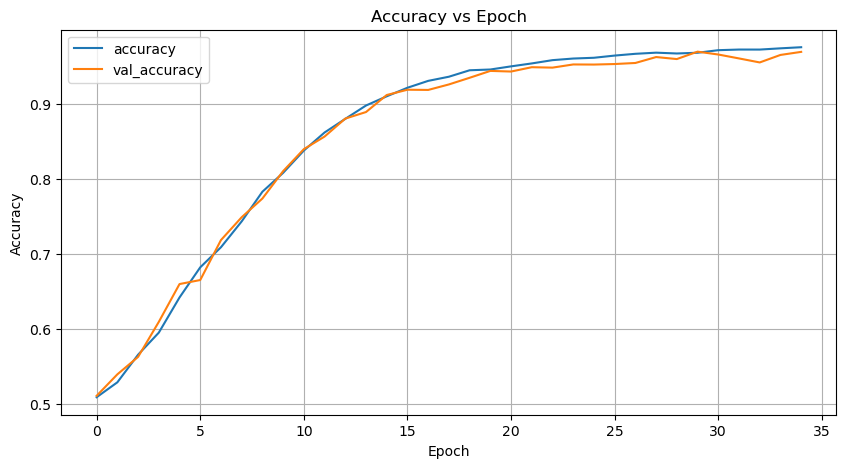

In [59]:
plt.figure(figsize=(10,5))
plt.plot(range(len(history.history['accuracy'])),history.history['accuracy'], label= "accuracy")
plt.plot(range(0,len(history.history['val_accuracy'])),history.history['val_accuracy'], label= "val_accuracy")
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epoch")
plt.legend()
plt.show()

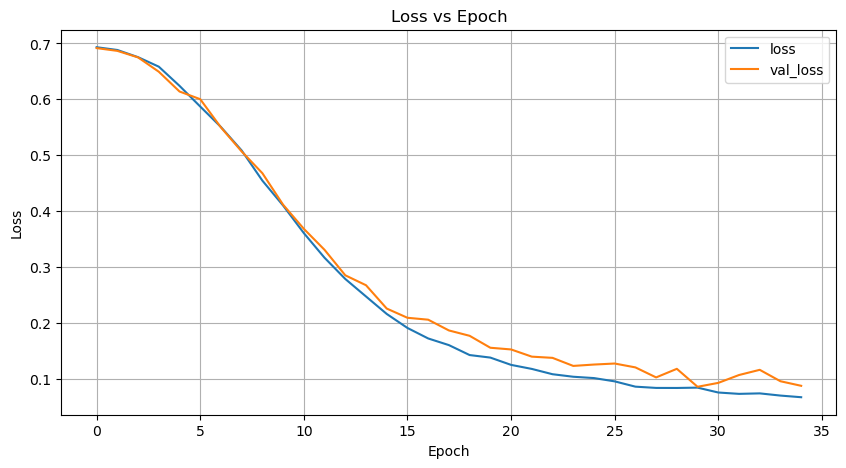

In [60]:
plt.figure(figsize=(10,5))
plt.plot(range(0,len(history.history['loss'])),history.history['loss'], label= "loss")
plt.plot(range(0,len(history.history['val_loss'])),history.history['val_loss'], label= "val_loss")
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.legend()
plt.show()

In [61]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

277/277 - 32s - 116ms/step - accuracy: 0.9719 - loss: 0.0842

Test accuracy: 0.9718834757804871


In [62]:
len(x_test)

8856

In [63]:
y_pred=model.predict(x_test)

277/277 ━━━━━━━━━━━━━━━━━━━━ 36s 131ms/step


In [64]:
y_pred.shape

(8856, 1)

In [65]:
len(last_label)

44280

In [66]:
y_test

array([1, 1, 1, ..., 0, 1, 0])

In [67]:
y_pred

array([[9.9564552e-01],
       [9.9295092e-01],
       [9.9737465e-01],
       ...,
       [6.2234802e-05],
       [9.9999815e-01],
       [7.4110873e-02]], dtype=float32)

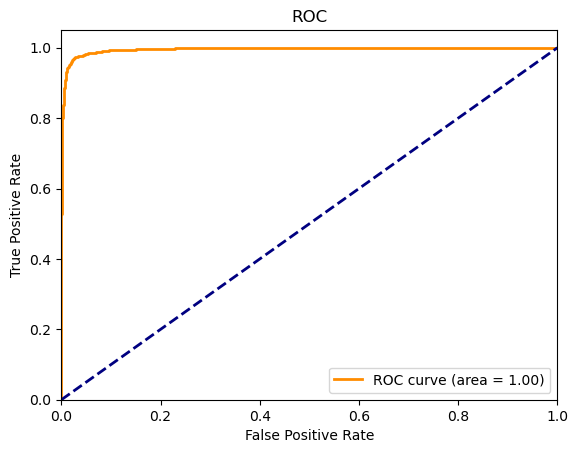

In [68]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#roc plot for specific class
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [69]:
from sklearn.metrics import roc_auc_score
pred_prob = model.predict(x_test)
#auc scores
auc_score = roc_auc_score(y_test, pred_prob)
print(auc_score)

277/277 ━━━━━━━━━━━━━━━━━━━━ 33s 118ms/step
0.9955645428662074


In [71]:
save_model = True
if save_model:
    save_model_path = "./"
    model.save("pretrained_model.h5")